<a href="https://colab.research.google.com/github/Robin-01/California-Coastal-Sea-Currents/blob/main/wind_03_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Run this cell to mount your google drive in colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 6.8 MB/s eta 0:00:00


In [4]:
import numpy as np                 #for general calculations.
import matplotlib.pyplot as plt    #making plots.
import xarray as xr
import cartopy.crs as ccrs         # to plot maps with different projections
import cartopy.feature as cfeature # to plot coastlines, land, borders, etc.

In [5]:
wind_03_03 = '/content/drive/MyDrive/DSO/Group Project/CCMP_Wind_Analysis_20240303_V03.1_L4.nc'
wind = xr.open_dataset(wind_03_03)

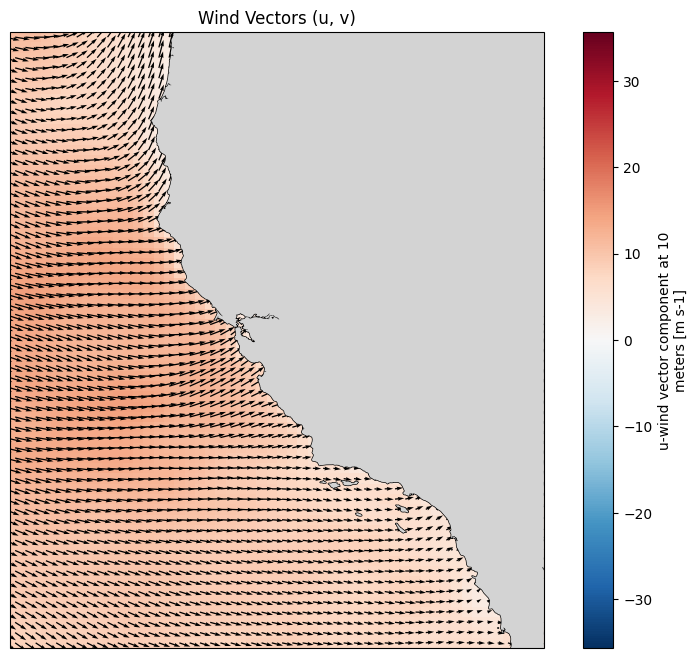

In [26]:
ds_sel = wind.isel(time=0) #Plot using in-built xarray tools; isel() selects based on specified indices

# Extract variables
u = ds_sel["uwnd"]      # zonal wind (east-west)
v = ds_sel["vwnd"]      # meridional wind (north-south)
lat = ds_sel["latitude"]
lon = ds_sel["longitude"]

# -------------------------
# Plot with Cartopy
# -------------------------
fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=":")
ax.set_extent([-128, -115, 30, 45], crs=ccrs.PlateCarree())  # CA offshore
ax.add_feature(cfeature.LAND, facecolor='lightgray', zorder=2)
wind.isel(time=0)['uwnd'].plot(ax=ax, cmap='RdBu_r', transform=ccrs.PlateCarree(), zorder=1)

# Quiver plot
# Use .values because quiver wants numpy arrays
q = ax.quiver(lon.values, lat.values, u.values, v.values,
              transform=ccrs.PlateCarree(), scale=400)

plt.title("Wind Vectors (u, v)")
plt.show()